In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model

/Users/tomasz/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/tomasz/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
aapl = pd.read_csv('aapl.us.txt', index_col=0)
aapl['return'] = aapl['Close'].pct_change()
aapl = aapl['return']
aapl.index = pd.to_datetime(aapl.index, format='%Y-%m-%d')
aapl.dropna(inplace=True)

In [47]:
indx = aapl.index
start_loc = 0
end_loc = len(aapl) - 1 - 20
predicted = np.zeros((20, 3))
dists = ['normal', 't', 'skewt']
actual = aapl[end_loc + 1:]**2

In [48]:
actual

Date
2017-10-16    3.389572e-04
2017-10-17    1.371570e-05
2017-10-18    1.971604e-05
2017-10-19    5.608557e-04
2017-10-20    3.017962e-06
2017-10-23    2.640332e-07
2017-10-24    3.571831e-05
2017-10-25    1.942887e-05
2017-10-26    4.117052e-05
2017-10-27    1.283818e-03
2017-10-30    5.047070e-04
2017-10-31    1.933660e-04
2017-11-01    1.614316e-04
2017-11-02    5.382542e-05
2017-11-03    6.805835e-04
2017-11-06    1.036634e-04
2017-11-07    1.003404e-05
2017-11-08    6.740242e-05
2017-11-09    4.202488e-06
2017-11-10    1.095317e-05
Name: return, dtype: float64

In [18]:
for i in range(20):
    for dist in dists:
        model = arch_model(aapl[start_loc:end_loc+i], p=1, q=1, mean='constant', vol='GARCH', dist=dist)
        model_fit = model.fit(disp='off')
        forecast = model_fit.forecast()
        predicted[i, dists.index(dist)] = forecast.variance.values[-1, :][0]

/Users/tomasz/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008065. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/tomasz/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008065. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/tomasz/opt/anaconda3/lib/python3.9/site-pac

/Users/tomasz/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000806. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/tomasz/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008059. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/tomasz/opt/anaconda3/lib/python3.9/site-pack

/Users/tomasz/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/tomasz/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008056. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/tomasz/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008056. Parameter
estimation work better wh

/Users/tomasz/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008051. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/tomasz/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008051. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
/Users/tomasz/opt/anaconda3/lib/python3.9/site-pac

In [28]:
model = arch_model(aapl[start_loc:end_loc], p=1, q=1, mean='constant', vol='GARCH', dist=dist)
model_fit = model.fit(disp='off')
forecast = model_fit.forecast()

/Users/tomasz/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0008065. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [30]:
forecast.variance.values[-1, 0]

0.00018148875093516908

In [21]:
actual**2

Date
2017-10-16    3.389572e-04
2017-10-17    1.371570e-05
2017-10-18    1.971604e-05
2017-10-19    5.608557e-04
2017-10-20    3.017962e-06
2017-10-23    2.640332e-07
2017-10-24    3.571831e-05
2017-10-25    1.942887e-05
2017-10-26    4.117052e-05
2017-10-27    1.283818e-03
2017-10-30    5.047070e-04
2017-10-31    1.933660e-04
2017-11-01    1.614316e-04
2017-11-02    5.382542e-05
2017-11-03    6.805835e-04
2017-11-06    1.036634e-04
2017-11-07    1.003404e-05
2017-11-08    6.740242e-05
2017-11-09    4.202488e-06
2017-11-10    1.095317e-05
Name: return, dtype: float64

In [19]:
predicted

array([[1.79657580e-04, 1.78154481e-04, 1.81488751e-04],
       [1.76171315e-04, 1.35466314e-04, 1.36390499e-04],
       [1.98276078e-04, 1.42167155e-04, 1.43053273e-04],
       [2.02223307e-04, 1.93237008e-04, 1.39424212e-04],
       [1.88472077e-04, 1.89571545e-04, 1.37004418e-04],
       [2.47363537e-04, 2.44237270e-04, 2.44476250e-04],
       [2.47255848e-04, 2.31071641e-04, 2.34498647e-04],
       [2.33776205e-04, 2.19714152e-04, 2.29255258e-04],
       [2.13481399e-04, 2.11877507e-04, 2.11811737e-04],
       [2.07991111e-04, 2.05551592e-04, 2.05560335e-04],
       [2.01134619e-04, 1.36399339e-04, 1.37947491e-04],
       [3.12605444e-04, 3.12327741e-04, 1.75653516e-04],
       [3.29132523e-04, 2.50427574e-04, 3.59895631e+01],
       [3.22416544e-04, 3.28424945e-04, 1.86651664e-04],
       [3.19219095e-04, 3.24306676e-04, 9.49604361e+02],
       [2.99884896e-04, 3.05312626e-04, 1.84624661e-04],
       [3.38211589e-04, 3.46993405e-04, 2.00940955e-04],
       [3.20439550e-04, 3.29581

In [40]:
predicted[:, 0]

array([0.00017966, 0.00017617, 0.00019828, 0.00020222, 0.00018847,
       0.00024736, 0.00024726, 0.00023378, 0.00021348, 0.00020799,
       0.00020113, 0.00031261, 0.00032913, 0.00032242, 0.00031922,
       0.00029988, 0.00033821, 0.00032044, 0.00029822, 0.00028241])

<AxesSubplot:xlabel='Date'>

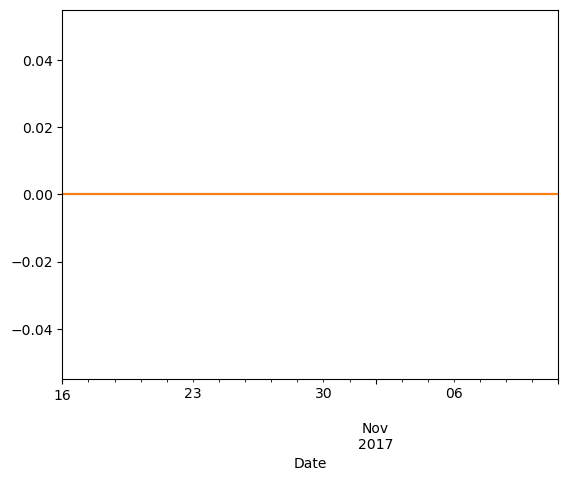

In [50]:
# actual.plot()
pd.Series(predicted[:, 0], index=actual.index).plot()
pd.Series(predicted[:, 1], index=actual.index).plot()
# pd.Series(predicted[:, 2], index=actual.index).plot()

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
pd.DataFrame({
    'MAE': [mean_absolute_error(actual, predicted[:, 0]), mean_absolute_error(actual, predicted[:, 1]), mean_absolute_error(actual, predicted[:, 2])],
    'RMSE': [np.sqrt(mean_squared_error(actual, predicted[:, 0])), np.sqrt(mean_squared_error(actual, predicted[:, 1])), np.sqrt(mean_squared_error(actual, predicted[:, 2]))]
}, index=['normal', 't', 'skewt'])

,MAE,RMSE
normal,0.010650,0.014233
t,0.010648,0.014233
skewt,63.450634,221.724422


In [51]:
aapl

Date
1984-09-10   -0.005992
1984-09-11    0.018228
1984-09-12   -0.029929
1984-09-13    0.055481
1984-09-14    0.014547
                ...   
2017-11-06    0.010182
2017-11-07    0.003168
2017-11-08    0.008210
2017-11-09   -0.002050
2017-11-10   -0.003310
Name: return, Length: 8363, dtype: float64

In [80]:
y_test = aapl[-252:]
y_test

Date
2016-11-11    0.006033
2016-11-14   -0.025112
2016-11-15    0.013168
2016-11-16    0.026942
2016-11-17   -0.000370
                ...   
2017-11-06    0.010182
2017-11-07    0.003168
2017-11-08    0.008210
2017-11-09   -0.002050
2017-11-10   -0.003310
Name: return, Length: 252, dtype: float64

In [84]:
rolling_preds = []
rolling_preds_mean = np.zeros(y_test.shape[0])

for i in range(y_test.shape[0]):
    train = aapl[:-(y_test.shape[0]-i)]
    model = arch_model(train, p=1, q=1, rescale = False, dist='t')
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1, reindex=True)
    rolling_preds.append(pred.variance.values[-1,:][0])
    rolling_preds_mean[i]= pred.mean.values[-1,:][0]

rolling_preds = pd.Series(rolling_preds, index=y_test.index)

/Users/tomasz/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/tomasz/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/tomasz/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/Users/tomasz/opt/anaconda3/lib/python3.9/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsq

<AxesSubplot:xlabel='Date'>

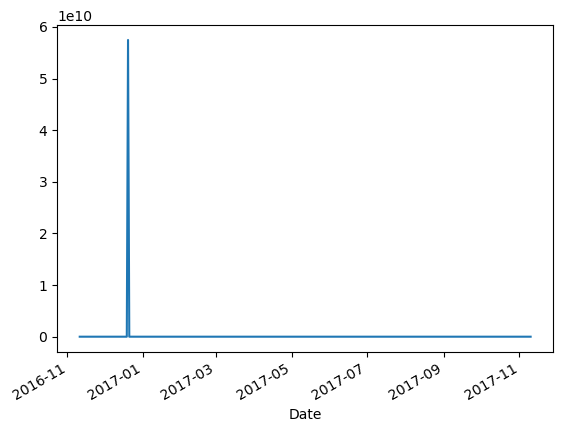

In [85]:
rolling_preds.plot()
# y = (y_test-rolling_preds_mean)**2
# y.plot()